#### Interactive and geographical graphics

Plotly and Bokeh are commonly used tools for interactive graphics in Python.

Plotly is an interactive visualization library where as Cufflinks binds Plotly directly to pandas dataframes.
To do some offline imports from plotly,  version 1.9.4+ is needed for offline plotting.

In [1]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# to check the version
from plotly import __version__
print(__version__)

5.13.1


To use plotly as open source library locally, create graphs offline and save them locally, it is needed to do some offline imports from plotly.offline.

In [3]:
# Offline imports to work locally
from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot

In [4]:
#import cufflinks as well
import cufflinks as cf

To initiate the plotly notebook mode, it is needed to set it True at the start of each notebook session. It can be done for this current notebook.

In [5]:
init_notebook_mode(connected=True)

Cufflinks can also be configured to work offline in jupyter notebook with plotly offline. To do this, it is needed to run cf.go_offline() for offline use. 

To switch back to online mode and save graphics in on online plotly account using cf.go_online(). 

In [6]:
cf.go_offline()

#### Generate data

use np.random.randn(100,4) to generate 100 rows and 4 columns. Name the columns as A, B, C, D

In [7]:
# Generate dataset with 100 rows and 4 columns name A, B, C, D
df1 = pd.DataFrame(np.random.randn(100,4), columns = ['A','B','C','D'])
df1.head()

,A,B,C,D
0,2.378159,-0.260341,-1.596179,-0.571501
1,-1.417214,-0.465794,-0.532842,-1.705256
2,0.508859,1.904534,-0.848520,-0.446805
3,0.484316,-0.664293,-0.361718,2.176588
4,0.002573,0.479993,0.982975,-0.317132


In [9]:
# generate another dataset with two columns 'Fruit','Count'
# pass a dictionary to pd.DataFrame()
df2 = pd.DataFrame({'Fruit':['Apple','Banana','Pear','Mango'],
                   
                   'Count':[32,43,50,32]})
df2.head()

,Fruit,Count
0,Apple,32
1,Banana,43
2,Pear,50
3,Mango,32


#### Basic and common plots
By call just plot(), pandas will generate plot with matplotlib. 

Changing plot() to iplot() do the magic and the plot is now interactive!

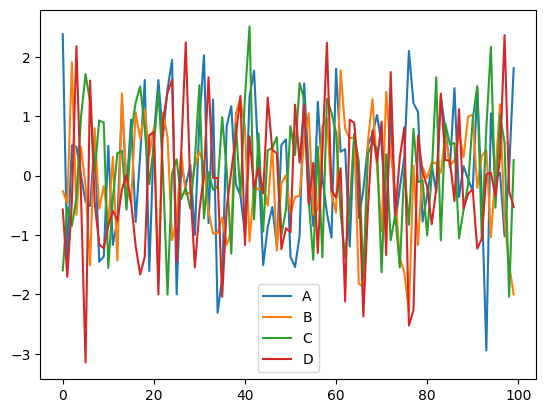

In [11]:
# iplot()
df1.plot()
df1.iplot()

There is a range of options. Save, zoom, zoom in, zoom out, autoscale and so on.
In the legend, it can turn anyone on or off with a click, to see what is required (only one or more say A, B etc).

We have range of option with cufflinks and iplot() using kind parameter as well

In [14]:
# cufflinks with iplot and using parameter kind
df1.iplot(kind='scatter',x='A',y='B',mode='markers',size=10)

# if there is no 'mode', it will start connecting data points using lines
df1.iplot(kind='scatter',x='A',y='B',size=10)


In [16]:
# kind = 'bar'
df2.iplot(kind='bar',x='Fruit',y='Count')
df1.sum().iplot(kind='bar')

In [17]:
# kind  = 'box'
df1.iplot(kind = 'box')

In [19]:
# kind = 'surface'
df3 = pd.DataFrame({'x':[1,2,3,4,5], 'y':[10,20,30,20,10], 'z':[5,4,3,2,1]})
df3.iplot(kind='surface')# colorscale = 'rdylbu'

In [21]:
# kind = 'hist'
# single column
df1['A'].iplot(kind='hist',bins = 50)

# entire dataset
df1.iplot(kind = 'hist', bins = 25) #overlaped hist plots, trun ON/OFF

In [22]:
# kind = 'spread'
# spread is usually used for stock data. The code below will give the plot and a spread between two selected columns at each point
df1[['A','B']].iplot(kind = 'spread')

C:\Users\Nazanin\PycharmProjects\pythonProject\venv\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\Nazanin\PycharmProjects\pythonProject\venv\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



In [23]:
# kind = 'bubble'
# use bubble to show the third dimension as a size of the bubble! These plots are very common in plotting world GDP, happiness etc in united nation reports!
df1.iplot(kind='bubble',x='A',y='B',size='C')

In [24]:
# scatter_matrix()
df1.scatter_matrix()

#### Geographical plotting
Plotly provides a way to plot geographical data interactively using its choropleth type. Note that, matplotlib also provide its extension basemap for static geographical plotting.


In [34]:
import plotly

# Let's do the required import for geographical plotting
import plotly.graph_objs as go

In [35]:
# First building the data dictonery "trc" using dict method.
trc = dict(
    type = 'choropleth', # type of the plot
    locations = ['AZ','CA','VT'], # list of state abbreviations
    locationmode = 'USA-states', # This let's ploty know we are doing at USA national level
    colorscale= 'Viridis', # setting a color scale
    text= ['Arizona','California','Vermont'], # another key, text that hover over each location
    z=[10,20,30], # the actual value that will be shown on the color scale
    colorbar = {'title':'Colorbar Title'} # Passing what the color bar title willbe
)

#Let's create a layout variable, a nested dict object
lyt = dict(geo = dict(scope ='usa'))
# Passing data and layout to the go.Figure
map = go.Figure(data = [trc], layout = lyt)
# Passing map to iplot for plotting
iplot(map)

#### US Map Choropleth
The datasets are available on plotly github page.
Pass a link to the dataset and directly read into a dataframe

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [37]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   code           50 non-null     object 
 1   state          50 non-null     object 
 2   category       50 non-null     object 
 3   total exports  50 non-null     float64
 4   beef           50 non-null     float64
 5   pork           50 non-null     float64
 6   poultry        50 non-null     float64
 7   dairy          50 non-null     float64
 8   fruits fresh   50 non-null     float64
 9   fruits proc    50 non-null     float64
 10  total fruits   50 non-null     float64
 11  veggies fresh  50 non-null     float64
 12  veggies proc   50 non-null     float64
 13  total veggies  50 non-null     float64
 14  corn           50 non-null     float64
 15  wheat          50 non-null     float64
 16  cotton         50 non-null     float64
dtypes: float64(14), object(3)
memory usage: 6.8+ KB


Looking at the dataframe, there are individual columns for each state for exports of each entity such
as beef, dairy, veggies etc. 

To built a text column, that combine this information and  pass that column to text key that will hover on the plot (will explain next).

In [40]:
#Convert the column datatype from float to string first.
for col in df.columns:
    df[col] = df[col].astype(str)

In [41]:
# Check data and compare with the previous df.info
df.info() # the type is changed for the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   code           50 non-null     object
 1   state          50 non-null     object
 2   category       50 non-null     object
 3   total exports  50 non-null     object
 4   beef           50 non-null     object
 5   pork           50 non-null     object
 6   poultry        50 non-null     object
 7   dairy          50 non-null     object
 8   fruits fresh   50 non-null     object
 9   fruits proc    50 non-null     object
 10  total fruits   50 non-null     object
 11  veggies fresh  50 non-null     object
 12  veggies proc   50 non-null     object
 13  total veggies  50 non-null     object
 14  corn           50 non-null     object
 15  wheat          50 non-null     object
 16  cotton         50 non-null     object
dtypes: object(17)
memory usage: 6.8+ KB


In [42]:
# creating new col 'text', <br> single line break, \ line continuation
df['text'] = df['state'] + '<br>' +\
'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
'Wheat '+df['wheat']+' Corn '+df['corn']

In [43]:
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.0,0.6,1.0,1.56,0.0,0.0,0.0,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.4,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Fruit...


In [44]:
#saving modified dataset for future use.
df.to_csv('2011_us_ag_exports_mod.csv')

In [48]:
# create the data dictionary with some extra marker and colorbar arguments
# The data dict
data = dict(type='choropleth', colorscale = 'Earth', # random selection - try different from the list given below
            locations = df['code'], # passing column with state codes
            locationmode = 'USA-states',
            z = df['total exports'], # What the color nar will represent
            text = df['text'], # Newly generated column to hover
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Millions USD"}
)
# And our layout dictionary with some more arguments:
layout = dict(title = '2011 US Agriculture Exports by State',
              geo = dict(scope='usa',showlakes = True, # we want actual lake on the map
                         lakecolor = 'rgb(85,173,240)') # blue for lakes
             )
# Passing data and layout to the go.Figure
choromap = go.Figure(data = [data], layout = layout)
# Passing map to iplot for plotting
iplot(choromap)

Some possible colorscale you can try (please always look for the updated list for plotly documentation for
changes): 
['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu', 'Reds', 'Blues',
'Picnic', 'Rainbow', 'Portland', 'Jet', 'Hot', 'Blackbody', 'Earth', 'Electric',
'Viridis', 'Cividis']

#### World Choropleth Map



In [49]:
# Let's read world GDP data from plotly datasts
gdp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

#gdp.to_csv('2014_world_gdp.csv') # used to save the file for offline use, you can load and work with it!

In [50]:
gdp.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [51]:
# Data dictionary
data = dict(
    type = 'choropleth',
    locations = gdp['CODE'], # This is country code now
    z = gdp['GDP (BILLIONS)'],text = gdp['COUNTRY'], # Country name
    colorbar = {'title' : 'GDP Billions US'},
)

# Layout
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False, #
        projection = {'type':'mercator'}#'mollweide'}#"natural earth"}
    )
)
#Finally plotting
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Some possible projections you can try
(please always look for the updated list for plotly documentation for changes): 
['equirectangular', 'mercator', 'orthographic', 'natural earth',
'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal
equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic',
'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel
tripel', 'aitoff', 'sinusoidal']

#### Reference
https://plotly.com/python/
https://docs.bokeh.org/en/latest/
https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf
https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf
https://plotly.com/python/reference/#choropleth